<a href="https://colab.research.google.com/github/DQN-Labs/school-cheating-ai-using-cv/blob/main/school_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pillow tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense



In [ ]:
#conv layers
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#fully connected layers
model.add(Flatten())

model.add(Dense( activation = 'relu', units=64))
model.add(Dense( activation = 'softmax', units=2))



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,259,586 (4.80 MB)

 Trainable params: 1,259,586 (4.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(
        'data',
        target_size=(150, 150),
        class_mode='categorical')

Found 1030 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
        'data',
        target_size=(150, 150),
        class_mode='categorical')

Found 1030 images belonging to 2 classes.


In [ ]:
model.fit(train_set,epochs=5,validation_data=test_set)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8669 - loss: 0.4867 - val_accuracy: 0.8864 - val_loss: 0.1893
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 323ms/step - accuracy: 0.8991 - loss: 0.1998 - val_accuracy: 0.9631 - val_loss: 0.1214
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 456ms/step - accuracy: 0.9440 - loss: 0.1344 - val_accuracy: 0.9515 - val_loss: 0.1038
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 466ms/step - accuracy: 0.9626 - loss: 0.0935 - val_accuracy: 0.9767 - val_loss: 0.0531
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 331ms/step - accuracy: 0.9892 - loss: 0.0457 - val_accuracy: 0.9893 - val_loss: 0.0325


In [8]:
model.save("version_0-2.keras")

In [11]:
import keras
keras.saving.load_model("version_0-2.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [ ]:
train_set.class_indices

{'class_0': 0, 'class_1': 1}

In [ ]:
#Prediction

In [ ]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('/content/drive/MyDrive/data/class_1/30_jpg.rf.c75eb03c97b8badab00ee9944ad29366.jpg' ,target_size =(150,150))


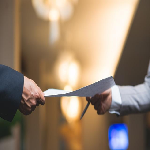

In [ ]:
test_image

In [ ]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [ ]:
test_image.shape

(150, 150, 3)

In [ ]:
test_image=test_image.reshape(1,150, 150, 3)

In [ ]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
result

array([[0., 1.]], dtype=float32)

In [ ]:
np.around(result)

array([[0., 1.]], dtype=float32)

In [ ]:
result=result.argmax()

In [ ]:
result

1

In [ ]:
## Class label of dog and cat

if result == 0:
    prediction = 'not cheat'
elif result == 1:
    prediction = 'cheat'
else:
    prediction = 'unknown'


In [ ]:
prediction

'cheat'

In [ ]:
model.save("model_1.keras")